In [1]:
import pandas as pd
import numpy as np

In [2]:
from preprocess import getdfs

In [3]:
train_df, val_df = getdfs()

In [4]:
train_df.head()

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,label
0,😛,🛐,😻,😑,😣,🙠,🙯,🚼,😒,🙼,😑,🙯,😣,0
1,🛐,😑,😪,😛,🚼,🙯,😣,🚅,😑,🙯,😹,😣,🙼,0
2,😛,🙯,😑,🚡,😣,🚼,🛐,🙲,😣,🙯,🛑,😑,🙼,0
3,😛,🚼,🛐,🙐,😣,🙯,😑,🙪,😑,🙼,🛆,😣,🙯,1
4,🛐,🚟,🚼,😛,🙋,😑,😣,🙯,😹,🙯,😑,😣,🙼,1


## Emoji to Vector

In [5]:
import gensim.models as gsm

e2v = gsm.KeyedVectors.load_word2vec_format('emoji2vec.bin', binary=True)

In [6]:
X_train = X_val = pd.DataFrame(columns=[f'c_{i+1}' for i in range(13)])

In [27]:
def embed_df(df : pd.DataFrame, embedding_dim : int = 300, num_columns: int = 13)-> pd.DataFrame :

    # Initialize a list to store rows of combined embeddings
    combined_embeddings = []

    # Iterate over each row in the dataframe
    for idx, row in df.iterrows():
        row_embeddings = []
        
        # Iterate over the 13 columns and get the embedding for each
        for i in range(num_columns):
            emoji = row[f'c_{i+1}']
            
            # If the text is not empty, fetch its embedding, else use a zero vector
            if emoji in e2v:
                embedding = e2v[emoji]
            else:
                embedding = np.zeros(embedding_dim)
            
            # Append the embedding to the row list
            row_embeddings.append(embedding)
        
        # Concatenate the embeddings for the row
        combined_embeddings.append(np.hstack(row_embeddings))

    # Convert the list of rows into a NumPy array
    X = np.vstack(combined_embeddings)
    
    return X



In [28]:
X_train = embed_df(train_df)
X_val = embed_df(val_df)

In [32]:
print(X_train.shape, X_val.shape)

(7080, 3900) (489, 3900)


In [29]:
y_train = train_df['label']
y_val = val_df['label']

## XGBoost

In [30]:
from usingxgboost import learnAndMakePredictions

In [31]:
y_true, y_pred = learnAndMakePredictions(X_train, y_train, X_val, y_val)

(7080, 3900) (7080,)


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:12:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Metrics

In [33]:
from evaluate import Evaluate

              precision    recall  f1-score   support

     Class 0       0.80      0.76      0.78       252
     Class 1       0.76      0.80      0.78       237

    accuracy                           0.78       489
   macro avg       0.78      0.78      0.78       489
weighted avg       0.78      0.78      0.78       489



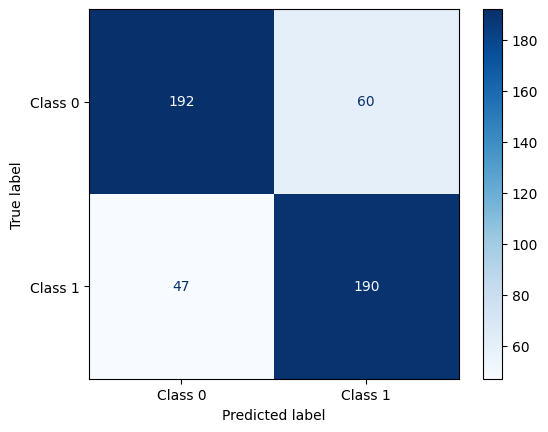

Accuracy is 0.7811860940695297


In [34]:
Evaluate(y_true, y_pred)